# **Exploratory Data Analysis: Mobile Device Usage Dataset & Student Alcohol Consumption**

**Group Number:** 97  
**Members:**  
Roy Rui #300176548  
Jiayi Ma #300263220
 



# **Introduction** (Draft)
The purpose of this report is to ______________
- **Educators** who want to understand student learning patterns.
- **School administrators** aiming to improve academic performance.
- **Researchers** analyzing student behavior.

We will provide **10 key insights** from our dataset, using Python for data analysis.

## Dataset I: Mobile Device Usage Dataset
**Author**: Vala Khorasani   
**Ref**:  https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/data  
**Shape**: Main set (*user_behavior_dataset.csv*): **11 Columns 700 Rows**  
**Description**:  
| Feature | Description | Data Type |
|---------|------------|-----------|
| **user_id** | Unique user identifier | Categorical |
| **device_type** | Type of mobile device | Categorical |
| **screen_time** | Daily screen time (minutes) | Numerical |
| **app_usage** | Number of apps used per day | Numerical |
| **social_media_time** | Time spent on social media (minutes) | Numerical |
| **gaming_time** | Time spent on gaming (minutes) | Numerical |
| **productivity_time** | Time spent on productivity apps (minutes) | Numerical |
| **notifications** | Number of notifications received per day | Numerical |
| **battery_usage** | Battery consumption (%) | Numerical |
| **purchases** | Number of in-app purchases | Numerical |
| **satisfaction_score** | User satisfaction rating (1-5) | Numerical |


## Dataset II: Student Alcohol Consumption
**Author**: UCI Machine Learning · Dmitrii Batogov  
**Ref**: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption  
**Shape**: Main set (*student_por.csv*, *student_mat.csv*): **33 Columns 649 Rows** (_por) || **395 Rows** (_mat) 
**Description**:  
| Feature       | Description  | Data Type   |
|--------------|-------------|-------------|
| **school**   | Student's school (GP: Gabriel Pereira, MS: Mousinho da Silveira) | Categorical |
| **sex**      | Gender (F: Female, M: Male) | Categorical |
| **age**      | Student's age (15-22) | Numerical |
| **address**  | Home location (U: Urban, R: Rural) | Categorical |
| **famsize**  | Family size (LE3: ≤3, GT3: >3) | Categorical |
| **Pstatus**  | Parent's cohabitation status (T: Together, A: Apart) | Categorical |
| **Medu**     | Mother's education (0-4) | Numerical |
| **Fedu**     | Father's education (0-4) | Numerical |
| **Mjob**     | Mother's job (Teacher, Health, Services, At_home, Other) | Categorical |
| **Fjob**     | Father's job (Teacher, Health, Services, At_home, Other) | Categorical |
| **reason**   | Reason for choosing this school (Home, Reputation, Course, Other) | Categorical |
| **guardian** | Student’s guardian (Mother, Father, Other) | Categorical |
| **traveltime** | Travel time to school (1-4, higher = longer) | Numerical |
| **studytime** | Weekly study time (1-4, higher = more) | Numerical |
| **failures** | Past class failures (0-4) | Numerical |
| **schoolsup** | Extra educational support (Yes/No) | Categorical |
| **famsup**   | Family educational support (Yes/No) | Categorical |
| **paid**     | Extra paid classes (Yes/No) | Categorical |
| **activities** | Extra-curricular activities (Yes/No) | Categorical |
| **nursery**  | Attended nursery school (Yes/No) | Categorical |
| **higher**   | Plans for higher education (Yes/No) | Categorical |
| **internet** | Internet access at home (Yes/No) | Categorical |
| **romantic** | In a romantic relationship (Yes/No) | Categorical |
| **famrel**   | Family relationship quality (1-5) | Numerical |
| **freetime** | Free time after school (1-5) | Numerical |
| **goout**    | Going out with friends (1-5) | Numerical |
| **Dalc**     | Workday alcohol consumption (1-5) | Numerical |
| **Walc**     | Weekend alcohol consumption (1-5) | Numerical |
| **health**   | Current health status (1-5) | Numerical |
| **absences** | Number of school absences (0-93) | Numerical |
| **G1**       | First period grade (0-20) | Numerical |
| **G2**       | Second period grade (0-20) | Numerical |
| **G3**       | Final grade (0-20, target variable) | Numerical |


**General Imports**

In [360]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

# **Dataset I**  
### **Load Dataset**  

In [361]:
# Load the datasets
user_behavior = pd.read_csv("dataset1/user_behavior_dataset.csv")

## **Insight 1: Age Distribution of Mobile Users** _(r1)_

### **a. Insight Statement**  
> The user age distribution is relatively even, with no distinct single peak. However, there are more users around the age of 20 and between 50-60 years. The KDE curve shows a smooth trend.

---

### **b. Supporting Evidence**  
The histogram below shows the distribution of **User Age (`Age`)**.  
- **X-Axis:** *Age (Years)*  
- **Y-Axis:** *Number of Users*  
- **Red Dashed Line:** Marks the peak age (35 years)  

---

### **c. Type of Analysis**  
**Univariate Distribution Analysis**  
- A **histogram with kernel density estimation (KDE)** visualizes the age distribution.  
- Vertical line annotation highlights the most frequent age group.

---

### **d. Reproducible Code**

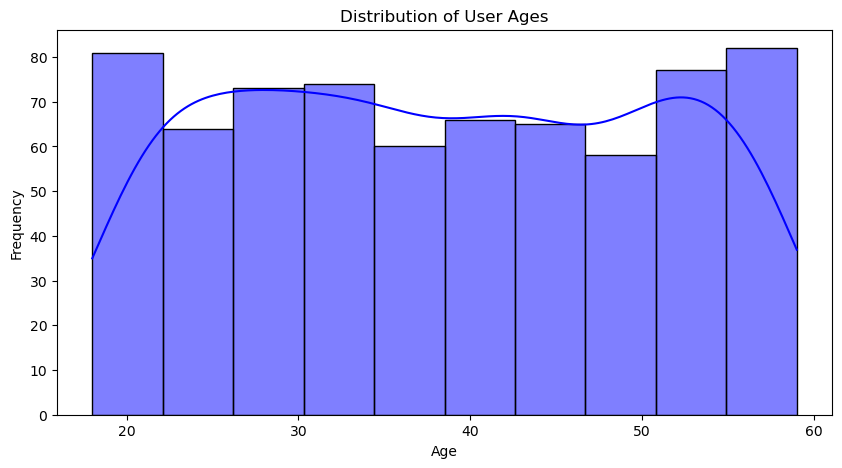

In [362]:
# Set figure size
plt.figure(figsize=(10,5))

# Generate histplot using seaborn
sns.histplot(user_behavior["Age"], bins=10, kde=True, color="blue")

# Labels and Title
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of User Ages")

# Show plot
plt.show()

## **Insight 2: Gender Comparison of App Usage Time** _(r4)_

### **a. Insight Statement**  
> There is no significant difference in daily app usage time between male and female users, as their average usage times are nearly identical.

---

### **b. Supporting Evidence**  
The bar chart below compares **App Usage Time (`App Usage Time (min/day)`)** by gender.  
- **X-Axis:** *Gender (Male/Female)*  
- **Y-Axis:** *Average Daily App Usage (Minutes)*  
- **Color Coding:** *Blue = Male, Pink = Female*  

---

### **c. Type of Analysis**  
**Comparing categories with 2 values**  
- **Bar plot** is used to compare mean app usage time across genders.  
- **Error bars** show variability, helping determine statistical significance. 

---

### **d. Reproducible Code**

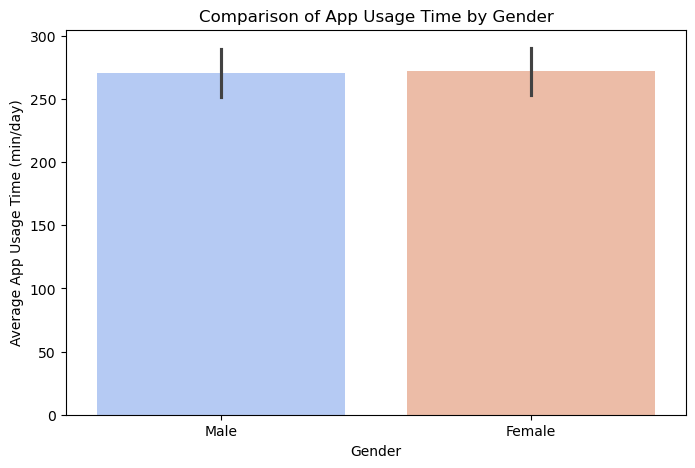

In [363]:
# Set figure size
plt.figure(figsize=(8,5))

# Generate bar plot using seaborn with distinct colors for genders
ax = sns.barplot(x="Gender", y="App Usage Time (min/day)", data=user_behavior, 
                 hue="Gender", estimator=np.mean, palette="coolwarm")

# Labels and Title
plt.xlabel("Gender")
plt.ylabel("Average App Usage Time (min/day)")
plt.title("Comparison of App Usage Time by Gender")

# Ensure the legend appears correctly
handles, labels = ax.get_legend_handles_labels()
if labels:
    plt.legend(title="Gender")

# Show plot
plt.show()

## **Insight 3: App Usage Time Across Age Groups** _(r7)_

### **a. Insight Statement**  
> Users aged **18-25 years** have the highest median app usage time, while **26-35 years** show the largest variability. **Older users (56+) tend to have lower app usage**, with their median usage significantly lower than younger groups.

---

### **b. Supporting Evidence**  
The **box plot** below visualizes **App Usage Time (min/day)** across different **Age Groups**.
- **X-Axis:** *Age Groups (Binned: 18-25, 26-35, 36-45, 46-55, 56+)*  
- **Y-Axis:** *App Usage Time (min/day)*  
- **Box Elements:**  
  - **Boxes represent interquartile range (IQR)** (25th to 75th percentile).  
  - **Whiskers extend to 1.5x IQR**, capturing most user data.  
  - **Outliers show extreme app usage patterns.**  

---

### **c. Type of Analysis**  
**(r7) Splitting Numerical Data by Categorical Groups**  
- **Box Plot** effectively splits numerical data (App Usage Time) by a categorical variable (Age Group).  
- **Categorizing age makes trends clearer than scatter plots.**  
- **IQR and outliers help identify variability across different user demographics.**  

---

### **d. Reproducible Code**

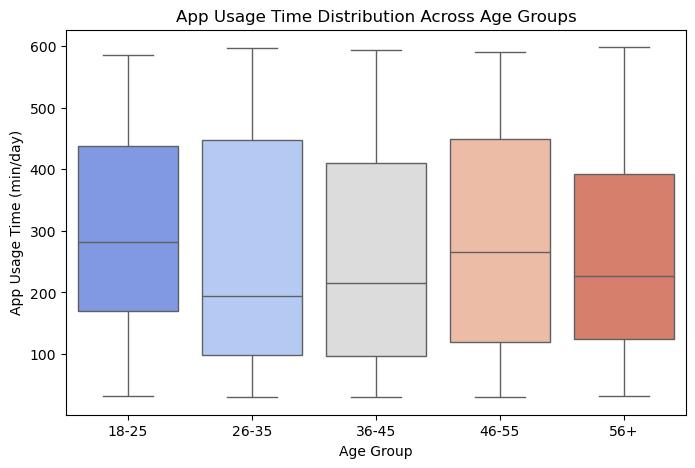

In [364]:
# Create Age Groups
bins = [18, 25, 35, 45, 55, 65]
labels = ["18-25", "26-35", "36-45", "46-55", "56+"]
user_behavior["Age Group"] = pd.cut(user_behavior["Age"], bins=bins, labels=labels, right=False)

plt.figure(figsize=(8,5))

# Boxplot with hue to avoid FutureWarning
sns.boxplot(x="Age Group", y="App Usage Time (min/day)", data=user_behavior, hue="Age Group", palette="coolwarm", legend=False)

# Labels and Title
plt.xlabel("Age Group")
plt.ylabel("App Usage Time (min/day)")
plt.title("App Usage Time Distribution Across Age Groups")

# Show plot
plt.show()

## **Insight 4: Battery Drain and Screen-On Time by Device Model** _(r7)_

### **a. Insight Statement**  
> The iPhone 12 exhibits the highest average daily battery consumption, around 1650 mAh/day, while the Google Pixel 5 has the lowest at 1450 mAh/day. The differences in battery drain across devices suggest varying energy efficiencies, possibly due to hardware optimizations and software management.

---

### **b. Supporting Evidence**  
The **bar plot** below visualizes the **average battery drain (mAh/day)** across different **device models**.
- **X-Axis:** *Battery Drain (mAh/day)*  
- **Y-Axis:** *Device Model (Sorted by Battery Consumption)*  
- **Bars:** Represent the mean battery consumption for each device model.  
- **Error Bars:** Indicate variability in battery drain for each device.


---

### **c. Type of Analysis**  
**(r5) Comparing Categories with More than 2 Values**  
- **Bar plot** effectively compares multiple device models based on their average battery drain.  
- **Sorting device models** from lowest to highest battery consumption makes differences clearer.  
- **Error bars provide additional insights** into variability across users.  


---

### **d. Reproducible Code**

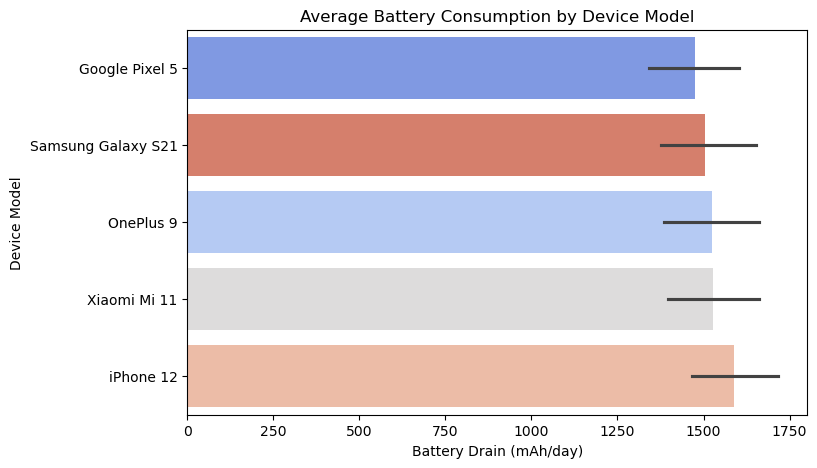

In [366]:
plt.figure(figsize=(8,5))

# Barplot with sorted order and hue variable to avoid FutureWarning
sns.barplot(x="Battery Drain (mAh/day)", y="Device Model", data=user_behavior, 
            order=user_behavior.groupby("Device Model")["Battery Drain (mAh/day)"].mean().sort_values().index,
            hue="Device Model", palette="coolwarm", legend=False)

# Labels and Title
plt.xlabel("Battery Drain (mAh/day)")
plt.ylabel("Device Model")
plt.title("Average Battery Consumption by Device Model")

# Show plot
plt.show()

## **Insight 5: User Behavior Class and Daily App Usage Time** _(r7)_

### **a. Insight Statement**  
> App usage time increases significantly with higher behavior classes. Users in Class 5 spend nearly 10 times more time on apps daily compared to Class 1 users, with a median usage of approximately 550 minutes/day.

---

### **b. Supporting Evidence**  
The boxplot below compares **App Usage Time (min/day)** across **User Behavior Classes (1-5)**.  
- **X-Axis:** *User Behavior Class (1 = Light, 5 = Extreme)*  
- **Y-Axis:** *App Usage Time (min/day)*  
- **Boxplot Representation:** Distribution of app usage time, including median, quartiles, and outliers.  

---

### **c. Type of Analysis**  
**Numerical/Categorical Distribution Analysis**  
- **Boxplot** visualizes the distribution of app usage time for each behavior class.  
- Outliers and quartiles highlight variability in usage patterns.  

---

### **d. Reproducible Code**

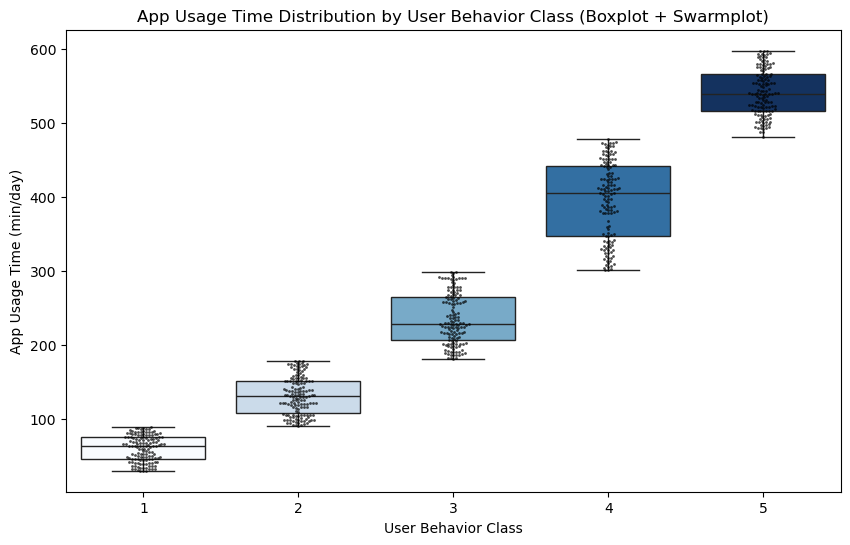

In [367]:
# Set figure size
plt.figure(figsize=(10,6))

# Updated boxplot: Assign `x` to `hue` and set `legend=False`
sns.boxplot(x="User Behavior Class", y="App Usage Time (min/day)", data=user_behavior, hue="User Behavior Class", palette="Blues", legend=False)

# Swarmplot to show individual data points
sns.swarmplot(x="User Behavior Class", y="App Usage Time (min/day)", data=user_behavior, color="black", size=2, alpha=0.7)

# Labels and Title
plt.xlabel("User Behavior Class")
plt.ylabel("App Usage Time (min/day)")
plt.title("App Usage Time Distribution by User Behavior Class (Boxplot + Swarmplot)")

# Show plot
plt.show()

## **Insight 6: Mobile Data Consumption by App Usage Time** _(r6)_

### **a. Insight Statement**  
> App usage time is positively correlated with mobile data consumption. However, the distribution suggests multiple user categories with distinct data usage patterns, rather than a strictly linear relationship.

---

### **b. Supporting Evidence**  
The scatter plot below visualizes the relationship between **App Usage Time (min/day)** and **Data Usage (MB/day)**.  
- **X-Axis:** *App Usage Time (min/day)*  
- **Y-Axis:** *Data Usage (MB/day)*  
- **Scatter Points:** Each dot represents an individual user. 
- **Regression Line:** A linear trendline is added to observe the correlation.   
- **Pearson Correlation Coefficient:** The correlation strength is quantified.  

---

### **c. Type of Analysis**  
**Use the scatterplot to highlight correlation**  
- **Scatterplot** visualizes the relationship between app usage time and mobile data consumption.  
- **Regression line (trendline)** provides a clearer indication of the relationship's strength.  
- **Pearson correlation coefficient (r-value)** quantifies the correlation strength.  

---

### **d. Reproducible Code**

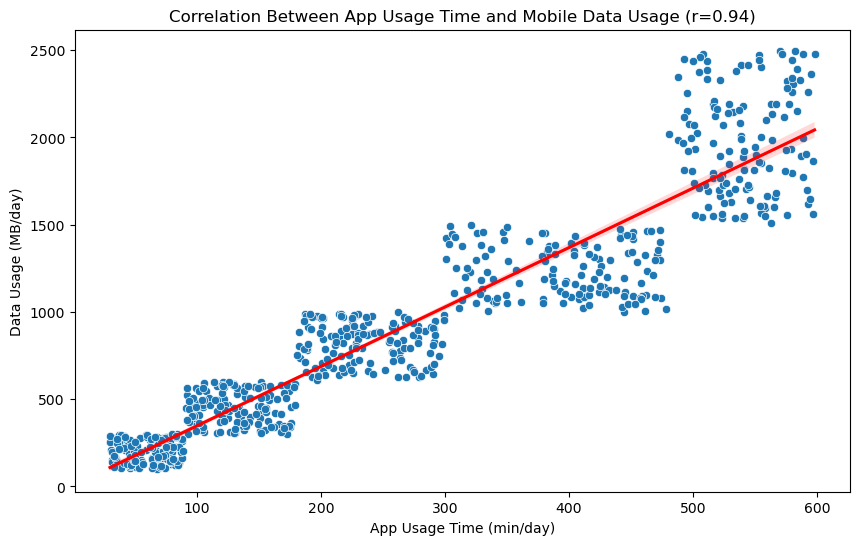

In [368]:
# Set figure size
plt.figure(figsize=(10,6))

# Scatterplot visualization
sns.scatterplot(x="App Usage Time (min/day)", y="Data Usage (MB/day)", data=user_behavior)

# Add regression trendline
sns.regplot(x="App Usage Time (min/day)", y="Data Usage (MB/day)", data=user_behavior, scatter=False, color="red")

# Compute Pearson correlation coefficient
r, p_value = pearsonr(user_behavior["App Usage Time (min/day)"], user_behavior["Data Usage (MB/day)"])

# Set title with computed correlation value
plt.title(f"Correlation Between App Usage Time and Mobile Data Usage (r={r:.2f})")
plt.xlabel("App Usage Time (min/day)")
plt.ylabel("Data Usage (MB/day)")

# Display the plot
plt.show()

## **Insight 7: Gender and Operating System Preference** _(r2)_

### **a. Insight Statement**  
> Android is the preferred operating system for both genders, with a slightly higher number of male users. iOS usage is nearly equal among males and females.

---

### **b. Supporting Evidence**  
The countplot below compares **Operating System** preference between **Male** and **Female** users.  
- **X-Axis:** *Operating System (iOS or Android)*  
- **Y-Axis:** *Number of Users*  
- **Color Coding:** *Blue = Male, Orange = Female*  

---

### **c. Type of Analysis**  
**Countplot for a category with multiple values**  
- **Countplot** is used to visualize user distribution across operating systems.  
- **Grouped bars** allow for easy gender-based comparison.  

---

### **d. Reproducible Code**

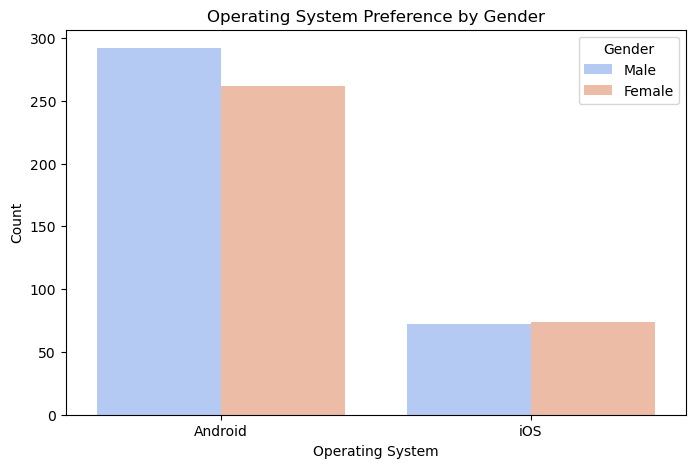

In [369]:
plt.figure(figsize=(8,5))

# Countplot to compare OS preference by gender
sns.countplot(x="Operating System", data=user_behavior, hue="Gender", palette="coolwarm")

# Labels and Title
plt.xlabel("Operating System")
plt.ylabel("Count")
plt.title("Operating System Preference by Gender")

# Add legend
plt.legend(title="Gender")

# Show plot
plt.show()

## **Insight 8: User Behavior Class and Screen-On Time** _(r7)_

### **a. Insight Statement**  
> Screen-on time increases significantly with higher user behavior classes, with Class 5 users averaging nearly 10 hours/day, while Class 1 users have less than 2 hours/day.

---

### **b. Supporting Evidence**  
The bar plot below shows the **Average Screen On Time (hours/day)** for each **User Behavior Class (1-5)**.  
- **X-Axis:** *User Behavior Class (1 = Light, 5 = Extreme)*  
- **Y-Axis:** *Average Screen On Time (hours/day)*  
- **Bars:** Represent the mean screen-on time for each behavior class.  

---

### **c. Type of Analysis**  
**Numerical/Categorical Analysis**  
- **Bar plot** compares the mean screen-on time across different user behavior classes.  
- Error bars (if added) show the variability within each class.  

---

### **d. Reproducible Code**

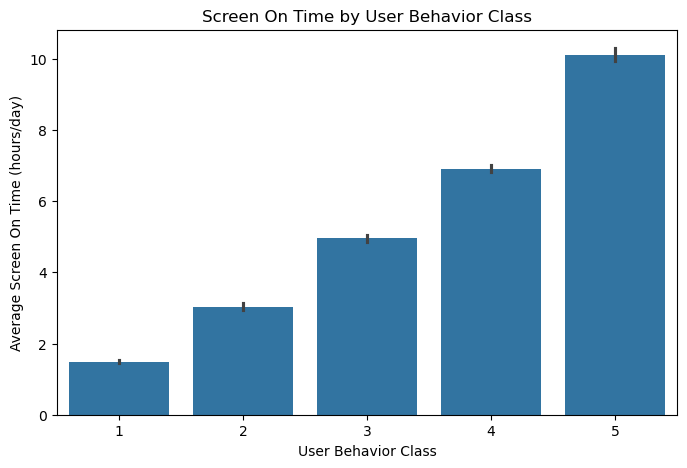

In [370]:
plt.figure(figsize=(8,5))
sns.barplot(x="User Behavior Class", y="Screen On Time (hours/day)", data=user_behavior, estimator=np.mean)

# Labels and Title
plt.xlabel("User Behavior Class")
plt.ylabel("Average Screen On Time (hours/day)")
plt.title("Screen On Time by User Behavior Class")

# Show plot
plt.show()

## **Insight 9: Device Model and Operating System Relationship** _(r5)_

### **a. Insight Statement**  
> iPhone 12 is the only iOS device in the dataset, while all other devices (e.g., Xiaomi Mi 11, Google Pixel 5, OnePlus 9) are Android devices, indicating limited iOS device diversity in the dataset.

---

### **b. Supporting Evidence**  
The bar plot below compares **Device Model** and **Operating System**.  
- **Y-Axis:** *Device Model (Sorted by Frequency)*  
- **X-Axis:** *Count of Devices*  
- **Color Coding:** *Blue = iOS, Orange = Android*  

---

### **c. Type of Analysis**  
** Comparing categories with more than 2 values for which you set the order **  
- **Countplot** is used to visualize device model distribution across operating systems.  
- **Sorting by frequency** ensures that the most common devices are displayed first. 

---

### **d. Reproducible Code**

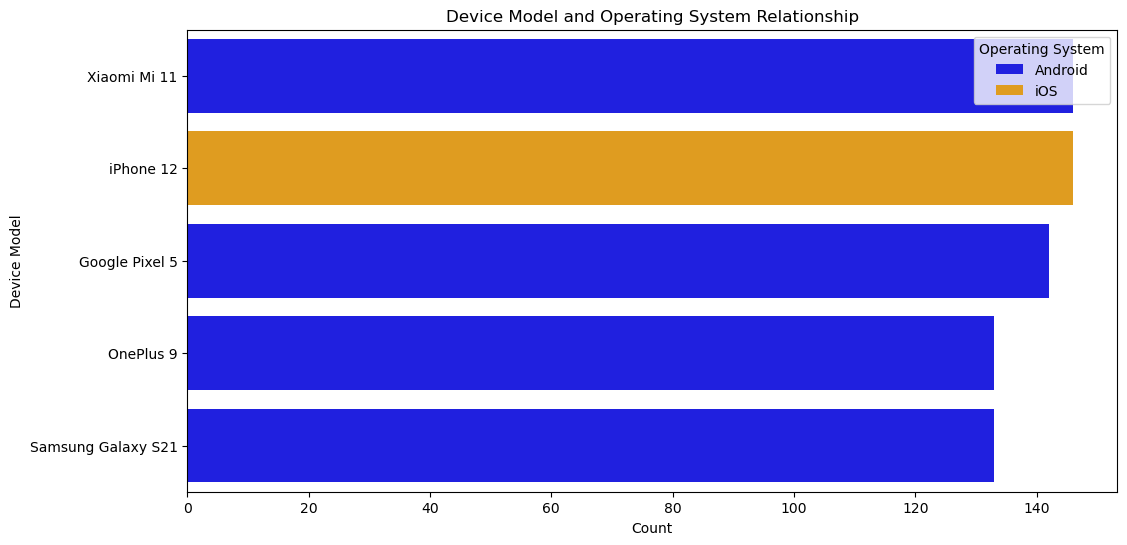

In [371]:
plt.figure(figsize=(12,6))

# Countplot with sorted order
sns.countplot(y="Device Model", data=user_behavior, hue="Operating System", 
              order=user_behavior["Device Model"].value_counts().index, palette={"iOS": "orange", "Android": "blue"})

# Labels and Title
plt.xlabel("Count")
plt.ylabel("Device Model")
plt.title("Device Model and Operating System Relationship")

# Add legend
plt.legend(title="Operating System")

# Show plot
plt.show()

## **Insight 10: User Behavior Class and Data Usage** _(r7)_

### **a. Insight Statement**  
> Users in higher behavior classes (4-5) consume significantly more mobile data, with Class 5 users having a median daily data usage exceeding 2000 MB, compared to Class 1 users whose median usage is below 200 MB. The interquartile range (IQR) expands with behavior class, indicating that higher behavior classes exhibit greater variability in data consumption.

---

### **b. Supporting Evidence**  
The box plot below visualizes the **distribution of Data Usage (MB/day)** across **User Behavior Classes (1-5)**.  
- **X-Axis:** *User Behavior Class (1 = Light, 5 = Extreme)*  
- **Y-Axis:** *Data Usage (MB/day)*  
- **Boxes represent the interquartile range (IQR)** (25th to 75th percentile).  
- **Whiskers extend to 1.5x the IQR** to show normal range variations.  
- **Outliers (points outside whiskers) indicate extreme data consumers.**  
- **Darker shades for higher classes** indicate an increasing trend in data usage.


---

### **c. Type of Analysis**  
**Split the data by certain categories to explore the numerical distributions**  
- **Box Plot** provides a comprehensive view of distribution, variability, and outliers in data usage per behavior class.  
- **The presence of more outliers in higher behavior classes suggests a subgroup of users consuming significantly higher amounts of data.**  


---

### **d. Reproducible Code**

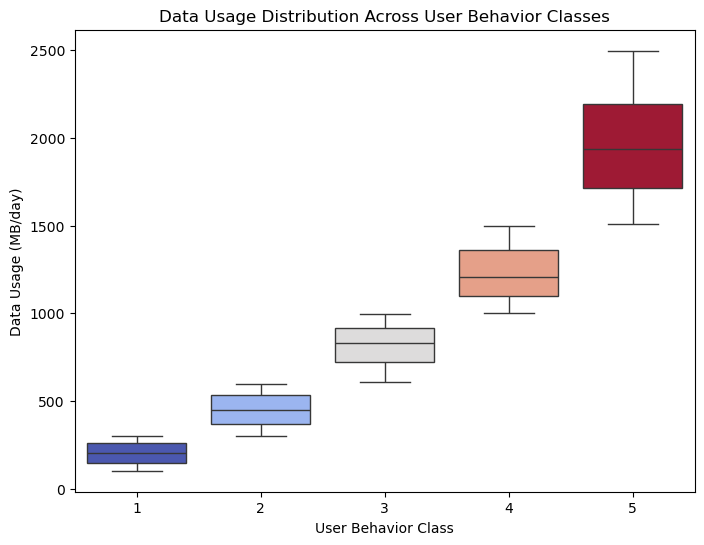

In [372]:
plt.figure(figsize=(8,6))

# Boxplot with explicit hue assignment to avoid FutureWarning
sns.boxplot(x="User Behavior Class", y="Data Usage (MB/day)", data=user_behavior, hue="User Behavior Class", palette="coolwarm")

# Labels and Title
plt.xlabel("User Behavior Class")
plt.ylabel("Data Usage (MB/day)")
plt.title("Data Usage Distribution Across User Behavior Classes")

# Hide legend (optional, if you don't want redundant information)
plt.legend().set_visible(False)

# Show plot
plt.show()


# **Dataset II**  
### **Load Dataset**  

In [373]:
# Load the datasets
student_mat = pd.read_csv("dataset2/student-mat.csv", sep=",")
student_por = pd.read_csv("dataset2/student-por.csv", sep=",")

## **Insight 1: Grade Distribution in Math** _(r1)_

### **a. Insight Statement**  
> Math grades (`G3`) are concentrated around **10-15**, with fewer students achieving extreme scores.

---

### **b. Supporting Evidence**  
The histogram below visualizes the grade distribution.  
**X-Axis:** *Final Grade (G3)* | **Y-Axis:** *Frequency*  
KDE curve highlights trends.

Additionally, the **summary statistics** reinforce this trend:
- **Mean:** *10.42* (indicating most students score around this value)
- **Median (50%):** *11.0* (suggesting a slightly right-skewed distribution)
- **Interquartile Range (25% - 75%):** *8 - 14* (middle 50% of students score within this range)
- **Min/Max:** *0 - 20* (showing full grade range)

| Statistic  | Value  |
|------------|--------|
| **Count**  | 395    |
| **Mean**   | 10.42  |
| **Std Dev** | 4.58  |
| **Min**    | 0      |
| **25%**    | 8      |
| **50% (Median)** | 11  |
| **75%**    | 14     |
| **Max**    | 20     |

---

### **c. Type of Analysis**  
**Univariate Distribution Analysis**  
- This analysis examines the distribution of a single variable (`G3` - final grade in Math).  
- Used a **histogram with KDE** to analyze grade dispersion.  
- Summary statistics help confirm the distribution pattern.  

---

### **d. Reproducible Code**  


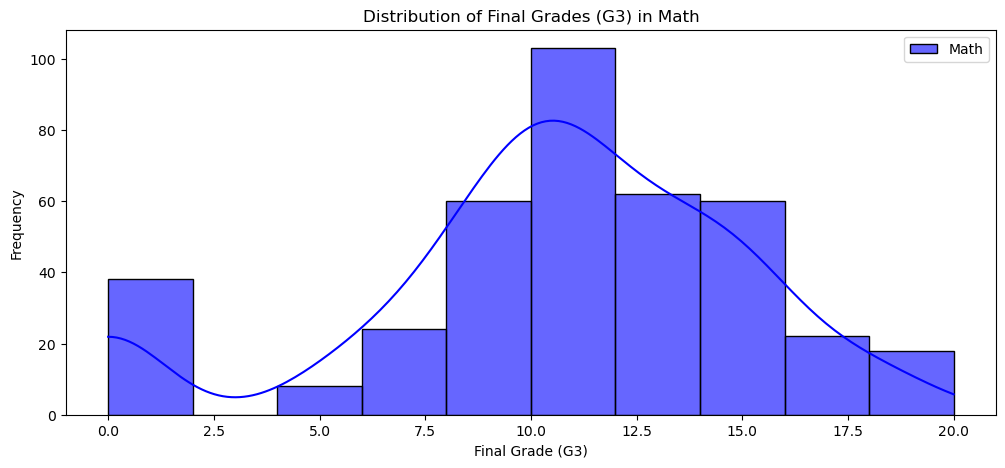

Summary Statistics for Math Grades (G3):
count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64


In [374]:
plt.figure(figsize=(12,5))

# Plot histogram for Math Grades (G3)
sns.histplot(student_mat["G3"], bins=10, kde=True, color="blue", label="Math", alpha=0.6)

# Plot histogram for Portuguese Grades (G3)
# sns.histplot(student_por["G3"], bins=10, kde=True, color="red", label="Portuguese", alpha=0.6)

# Labels and Title
plt.xlabel("Final Grade (G3)")
plt.ylabel("Frequency")
plt.title("Distribution of Final Grades (G3) in Math")
plt.legend()

# Show the plot
plt.show()

# Display summary statistics for Math grades
print("Summary Statistics for Math Grades (G3):")
print(student_mat["G3"].describe())

## **Insight 2: Students' Reasons for Choosing Their School** _(r2)_ 

### **a. Insight Statement**
> The most common `reason` for students choosing their school is **course preference**, followed by **proximity to home and school reputation**, while fewer students selected **other reasons**.

---

### **b. Supporting Evidence**
The countplot below shows the distribution of students' reasons for choosing their school.  
**X-Axis:** *Reason for Choosing School* | **Y-Axis:** *Count*  
The majority of students prioritize the specific **course preference**, followed by **proximity to home and reputation**.

---

### **c. Type of Analysis**
**Univariate Frequency Analysis**  
- Used **Seaborn's countplot** to analyze **a single categorical variable (`reason`)**.

---

### **d. Reproducible Code**

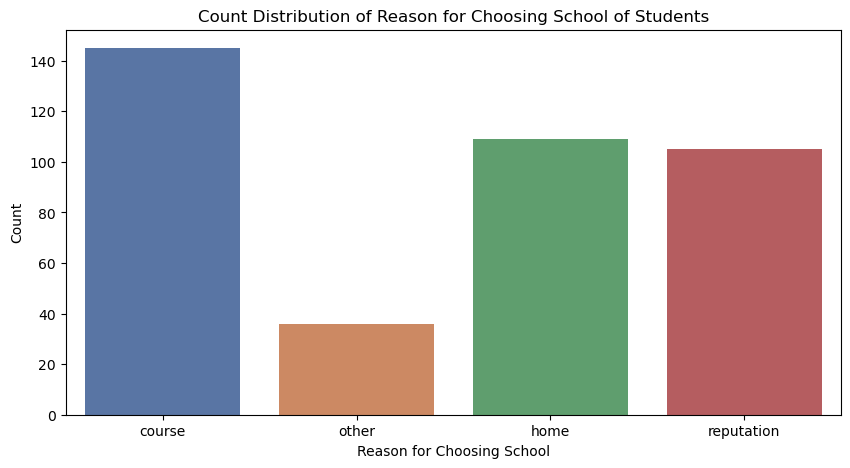

In [375]:
# Create figure
plt.figure(figsize=(10,5))

# Corrected Countplot with hue
sns.countplot(x="reason", data=student_mat, hue= "reason", palette="deep", legend=False)

# Labels and Title
plt.xlabel("Reason for Choosing School")
plt.ylabel("Count")
plt.title("Count Distribution of Reason for Choosing School of Students")

# Show plot
plt.show()

## **Insight 3: Parental Education Levels Among Math Students** _(r3)_

### **a. Insight Statement**
> Most students have parents with **lower education levels (0-3)**, while **higher education (4) is less common**.

---

### **b. Supporting Evidence**
The countplot below shows the **distribution of parental education levels** among students.  
**X-Axis:** *Parental Education Level (Grouped: 0-3 vs. 4)* | **Y-Axis:** *Count*  
<br>
It takes the higher (max) education level between the parents for each student, and group them into two categories: 0-3 and 4 by applying lambda expression shown below.  
Since its original dataset clasifies the education level as numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education. Our approach is to see whether the education level for students' parents having higher education or not.  
It turns out majority of students belong to families where **parents have lower education levels**.

---

### **c. Type of Analysis**
**Univariate Frequency Analysis**  
- **One categorical variable (`parent_edu_group`)** analyzed.

---

### **d. Reproducible Code**

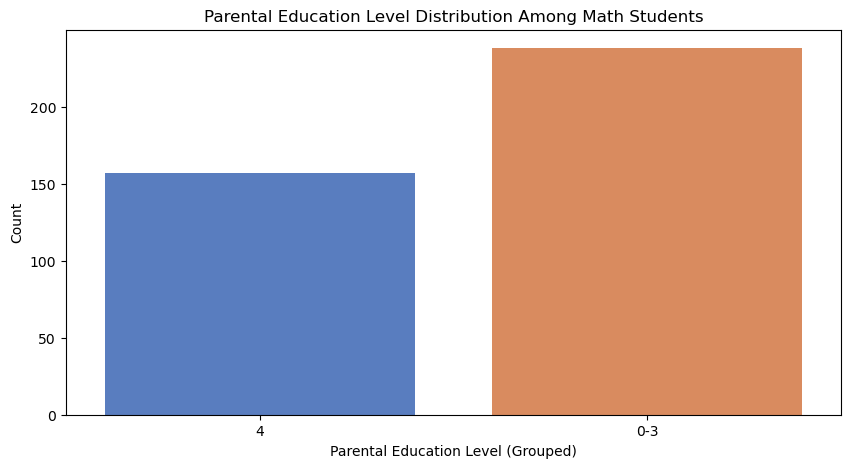

In [376]:
# Create a new column combining both Medu (Mother's Education) and Fedu (Father's Education)
student_mat["parent_edu"] = student_mat[["Medu", "Fedu"]].max(axis=1)
student_por["parent_edu"] = student_por[["Medu", "Fedu"]].max(axis=1)

# Group parental education into '0-3' (Lower) and '4' (Higher)
student_mat["parent_edu_group"] = student_mat["parent_edu"].apply(lambda x: "0-3" if x < 4 else "4")

# Create figure
plt.figure(figsize=(10,5))

# Countplot for Parental Education
sns.countplot(x="parent_edu_group", data=student_mat, hue = "parent_edu_group", palette="muted", legend=False)

# Labels and Title
plt.xlabel("Parental Education Level (Grouped)")
plt.ylabel("Count")
plt.title("Parental Education Level Distribution Among Math Students")

# Show plot
plt.show()

## **Insight 4: Gender Comparison of Weekend Alcohol Consumption** _(r4)_
### **a. Insight Statement**  
> Male students tend to have lower weekend alcohol consumption, while female students are more represented in higher consumption levels.

---

### **b. Supporting Evidence**  
The countplot below compares **Weekend Alcohol Consumption (`Walc`)** between male and female students.  
- **X-Axis:** *Weekend Alcohol Consumption (1 - 5)*  (Since `Walc` follow a predefined sequence (1, 2, 3, 4, 5), they can be analyzed as an ordered category.)
- **Y-Axis:** *Count of Students*  
- **Color-coded by Gender (Male = Blue, Female = Orange)** 

---

### **c. Type of Analysis**  
**Bivariate Categorical Analysis**  
- A **countplot** visualizes the count distribution of students consuming alcohol on weekends.  
- **Hue = Gender (`sex`)** allows comparison between male and female students.

---

### **d. Reproducible Code**


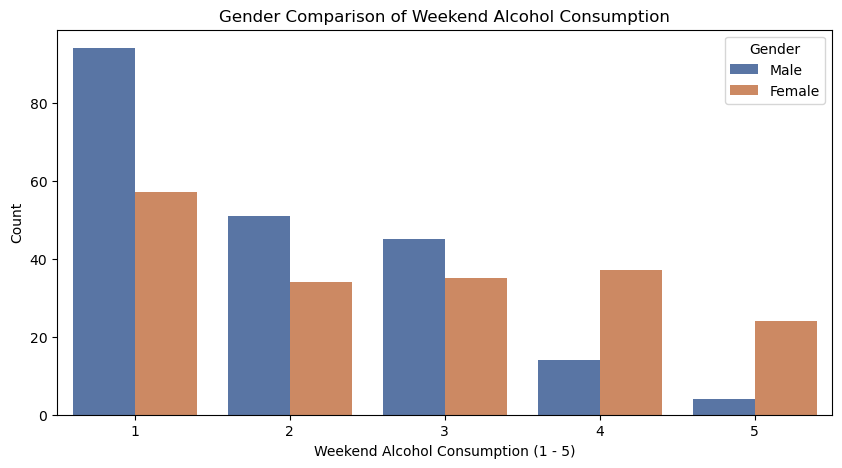

In [377]:
# Create figure
plt.figure(figsize=(10,5))

# Plot Countplot for Weekend Alcohol Consumption by Gender
sns.countplot(x="Walc", data=student_mat, hue="sex", palette="deep")

# Labels and Title
plt.xlabel("Weekend Alcohol Consumption (1 - 5)")
plt.ylabel("Count")
plt.title("Gender Comparison of Weekend Alcohol Consumption")

# Add Legend
plt.legend(title="Gender", labels=["Male", "Female"])

# Show plot
plt.show()

## **Insight 5: Parental Education Level and Daily Alcohol Consumption** _(r5)_

### **a. Insight Statement**
> There is **no clear correlation** between parental education level and daily alcohol consumption `Dalc` among students.

---

### **b. Supporting Evidence**
The **left chart**, which includes all students, shows that:
- The majority of students, regardless of their parents' education level, report a **`Dalc` = 1** (lowest alcohol consumption).
- The distribution of **higher `Dalc` levels (3, 4, 5)** appears similar across **both parental education groups (0-3 and 4)**.

The **right chart**, which excludes **`Dalc` = 1** to make the virtualization more clear to analyze:
- No significant **trend or concentration** of higher alcohol consumption levels is observed in either parental education group.
- Higher daily drinkers are evenly distributed across both groups.

Thus, **parental education level does not appear to be a strong predictor of daily alcohol consumption**.

---

### **c. Type of Analysis**
**Bivariate Categorical Analysis**  
- **Compared two categorical variables**:  
  - **Parental Education Level Group** (0-3 vs. 4)  
  - **Daily Alcohol Consumption (`Dalc`)** (values from 1 to 5).  

---

### **d. Reproducible Code**

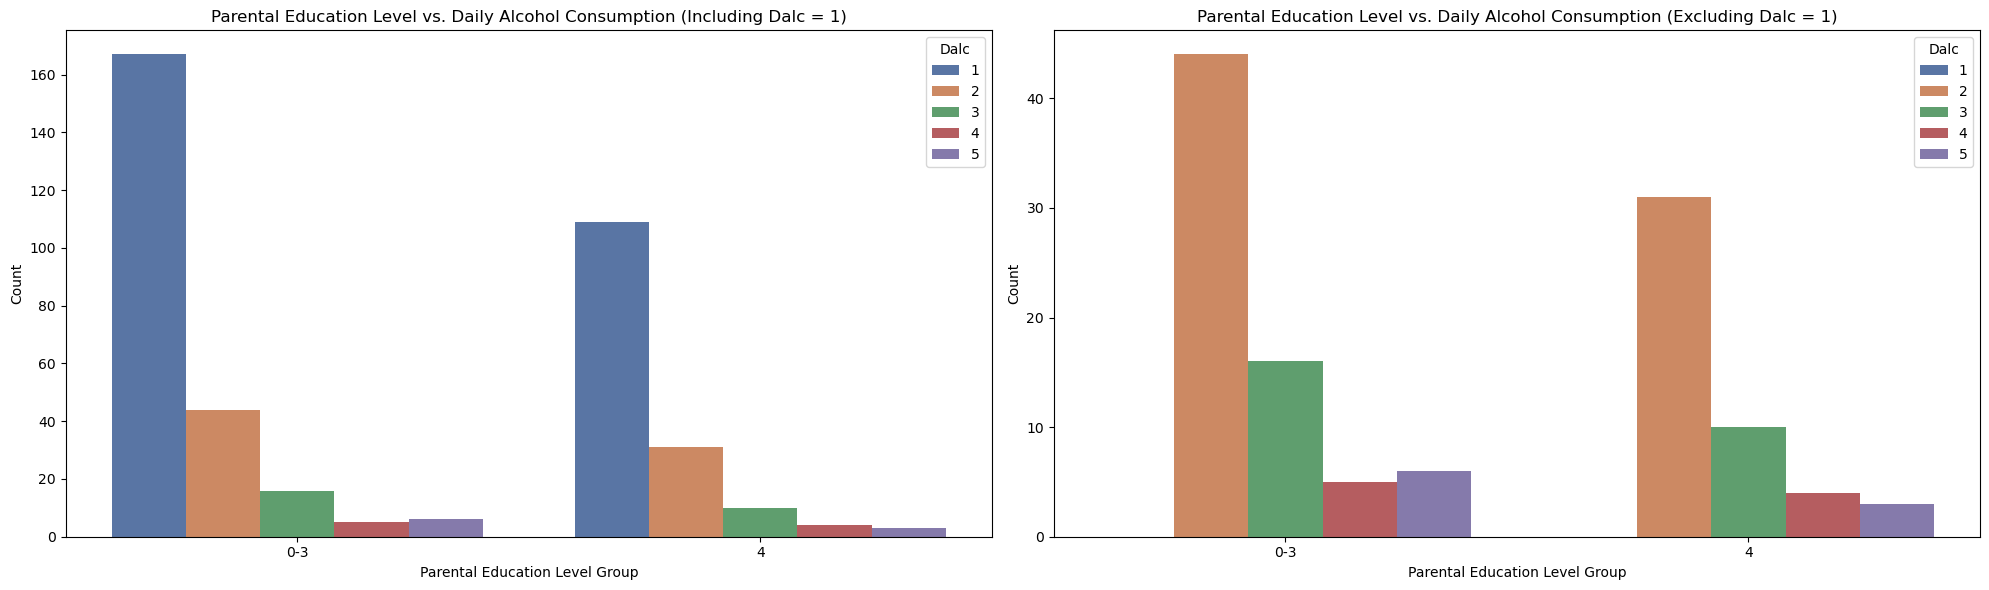

In [378]:
# Create a custom color palette with the exact number of colors needed
hue_order = sorted(student_mat["Dalc"].unique())
custom_palette = sns.color_palette("deep", len(hue_order))

# Define the order for the x-axis
x_order = sorted(student_mat["parent_edu_group"].unique())

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot including all Dalc values
sns.countplot(
    x="parent_edu_group",  
    data=student_mat, 
    hue="Dalc",  # Daily Alcohol Consumption as the secondary variable
    palette=custom_palette,
    hue_order=hue_order,
    order=x_order,
    ax=axes[0]
)
axes[0].set_title("Parental Education Level vs. Daily Alcohol Consumption (Including Dalc = 1)")
axes[0].set_xlabel("Parental Education Level Group")
axes[0].set_ylabel("Count")

# Filter out Dalc = 1
filtered_student_mat = student_mat[student_mat["Dalc"] != 1]

# Plot excluding Dalc = 1
sns.countplot(
    x="parent_edu_group",  
    data=filtered_student_mat, 
    hue="Dalc",  # Daily Alcohol Consumption as the secondary variable
    palette=custom_palette,
    hue_order=hue_order,
    order=x_order,
    ax=axes[1]
)
axes[1].set_title("Parental Education Level vs. Daily Alcohol Consumption (Excluding Dalc = 1)")
axes[1].set_xlabel("Parental Education Level Group")
axes[1].set_ylabel("Count")

# Show plot
plt.tight_layout()
plt.show()

## **Insight 6: Social Activity and Weekend Alcohol Consumption**

### **a. Insight Statement**  
> Students who go out more frequently (`goout` levels 4 and 5) tend to have higher levels of **weekend alcohol consumption (`Walc`)**, while those who go out less often (`goout` levels 1 and 2) mostly report lower alcohol intake.  

---  

### **b. Supporting Evidence**  
- The countplot shows that students with **low `goout` levels (1-2)** have the highest count in **low `Walc` levels (1-2)**.  
- As `goout` increases, the proportion of **higher `Walc` levels (3-5)** grows.  
- At **`goout` level 5**, students consuming alcohol at levels 4 and 5 appear more frequently compared to lower `goout` levels.  

---  

### **c. Type of Analysis**  
**Bivariate Categorical Analysis**  
- A **countplot** was used to explore the relationship between **social activity (`goout`)** and **weekend alcohol consumption (`Walc`)**.  
- **Color-coded bars** represent different levels of `Walc`, making trends in social activity and alcohol consumption clearer.  

---  

### **d. Reproducible Code**  


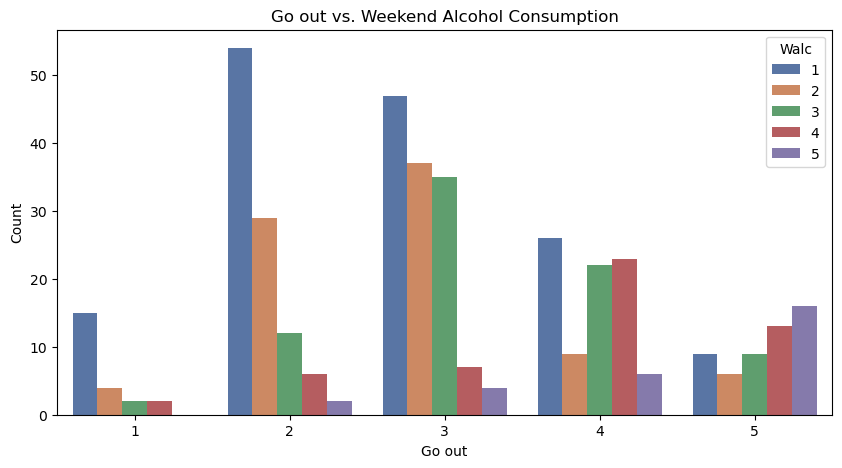

In [379]:
# Define the order for the x-axis
x_order = sorted(student_mat["goout"].unique())  # Unique levels of goout

# Create a custom color palette
hue_order = sorted(student_mat["Walc"].unique())  # Unique levels of Walc
custom_palette = sns.color_palette("deep", len(hue_order))

# Create figure
plt.figure(figsize=(10, 5))

# Plot countplot for Goout vs. Weekend Alcohol Consumption
sns.countplot(
    x="goout",  
    data=student_mat, 
    hue="Walc",  # Weekend Alcohol Consumption as the secondary variable
    palette=custom_palette,
    hue_order=hue_order,
    order=x_order
)

# Labels and Title
plt.title("Go out vs. Weekend Alcohol Consumption")
plt.xlabel("Go out")
plt.ylabel("Count")

# Show plot
plt.show()


## **Insight 7: Scatterplot for Correlation Analysis: Absences vs. Final Grade (G3)**  _(r6)_

### **a. Insight Statement**  
> Students with higher `absences` tend to have lower final grades (`G3`), though the correlation is not strictly linear.  

---  

### **b. Supporting Evidence**  
- The scatterplot visualizes the relationship between `absences` and `G3` for both Math and Portuguese courses.  
- The correlation coefficient of *-0.045671* between `absences` and `G3` is very close to 0, suggesting that there is almost no linear relationship between the number of absences and the final grade.
- However, a **dense cluster** of students with **fewer absences (0-10) and higher grades (above 10)** is evident.  

---  

### **c. Type of Analysis**  
**Bivariate Numerical Analysis**  
- Used a **scatterplot** to assess the relationship between **`absences` (x-axis)** and **final grades `G3` (y-axis).**  
- **Color-coded by course** to distinguish Math and Portuguese students.
- Calculated correlation coefficient to check possible linear correlation between two variable.  

---  

### **d. Reproducible Code**  


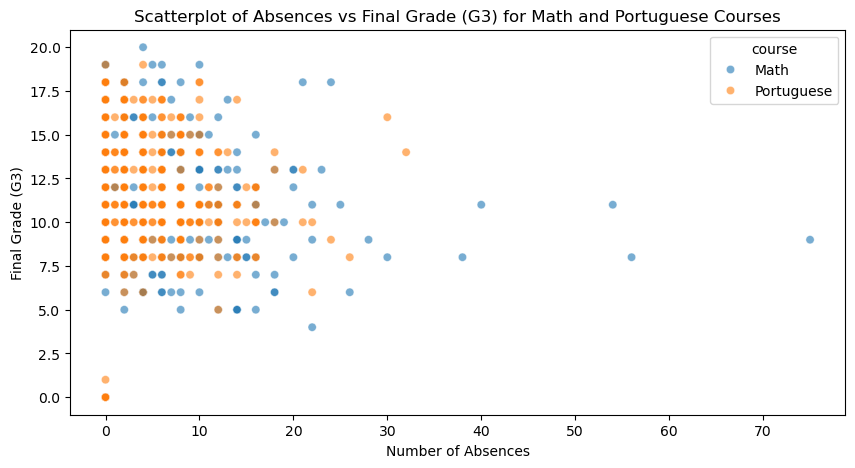

          absences        G3
absences  1.000000 -0.045671
G3       -0.045671  1.000000


In [380]:
# Combine datasets for absences and final grade (G3)
combined_students = pd.concat([
    student_mat[["absences", "G3"]].assign(course="Math"),
    student_por[["absences", "G3"]].assign(course="Portuguese")
])

# Create figure
plt.figure(figsize=(10,5))

# Scatterplot for Absences vs Final Grade (G3) with course distinction
sns.scatterplot(x="absences", y="G3", hue="course", data=combined_students, alpha=0.6)

# Labels and Title
plt.xlabel("Number of Absences")
plt.ylabel("Final Grade (G3)")
plt.title("Scatterplot of Absences vs Final Grade (G3) for Math and Portuguese Courses")

# Show plot
plt.show()

# Calculate correlation between absences and final grade (G3)
correlation = combined_students[["absences", "G3"]].corr()
print(correlation)

## **Insight 8: Final Grades (`G3`) Distribution by Average Alcohol Consumption** _(r7)_

### **a. Insight Statement**  
> Students with **highest/excessive average alcohol consumption (`avg_alcohol_level` Level 5)** do not achieve the **top `G3` scores**, whereas lower consumption levels still include high-performing students.  

---
### **b. Supporting Evidence**  
- The **boxplot** visualizes the **`G3` distribution** across categorized levels of **average alcohol consumption**.  
- **Levels 1-4** include students achieving **top `G3` scores (close to 20)**, while **Level 5 lacks any students with the highest scores**.  
- The **median `G3` grade slightly declines** as alcohol consumption increases, though the effect is not dramatic.  
- Outliers (white dots) indicate some students with **very low `G3` scores** across all consumption levels.  

---

### **c. Type of Analysis**  
**Numerical vs. Categorical Analysis**  
- Used **binning** to categorize `avg_alcohol_level` into **five levels** by getting average of `Dalc` and `Walc`.  
- **Boxplot** was used to compare the **distribution of `G3` (final grades)** across these categories.  
- The **absence of top `G3` scores in Level 5** suggests that **excessive alcohol consumption may limit academic excellence**.  

---

### **d. Reproducible Code**  

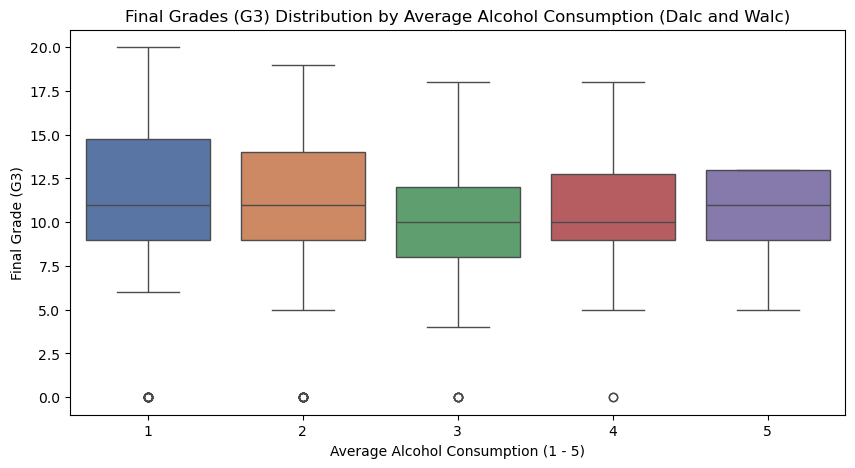

In [381]:
# Create a new column for average alcohol consumption
student_mat["avg_alcohol"] = (student_mat["Dalc"] + student_mat["Walc"]) / 2
student_por["avg_alcohol"] = (student_por["Dalc"] + student_por["Walc"]) / 2

# Define bins for categorizing avg_alcohol into five levels
# Five levels from 1 to 5 
# (0,1] → Level 1
# (1,2] → Level 2
# (2,3] → Level 3
# (3,4] → Level 4
# (4,5] → Level 5
bins = [0, 1, 2, 3, 4, 5]  
labels = [1, 2, 3, 4, 5]

# Apply binning
student_mat["avg_alcohol_level"] = pd.cut(student_mat["avg_alcohol"], bins=bins, labels=labels, include_lowest=True)
student_por["avg_alcohol_level"] = pd.cut(student_por["avg_alcohol"], bins=bins, labels=labels, include_lowest=True)

# Combine datasets
combined_students = pd.concat([
    student_mat[["G3", "avg_alcohol_level"]].assign(course="Math"),
    student_por[["G3", "avg_alcohol_level"]].assign(course="Portuguese")
])

# Create figure
plt.figure(figsize=(10,5))

# Plot boxplot for G3 distribution across categorized alcohol consumption levels
sns.boxplot(x="avg_alcohol_level", y="G3", data=student_mat, hue="avg_alcohol_level", palette="deep", legend=False)

# Labels and Title
plt.xlabel("Average Alcohol Consumption (1 - 5)")
plt.ylabel("Final Grade (G3)")
plt.title("Final Grades (G3) Distribution by Average Alcohol Consumption (Dalc and Walc)")

# Show plot
plt.show()


## **Insight 9: Health Status vs. Average Alcohol Consumption** 

### **a. Insight Statement**  
> Students with **better health (`health` = 5)** tend to have **higher counts in lower alcohol consumption levels (`avg_alcohol_level` = 1,2,3)**, while those with poorer health exhibit a **higher proportion of students in higher alcohol consumption levels (`avg_alcohol_level` = 4,5).**

---

### **b. Supporting Evidence**  
- The countplot shows that **students with better health (5)** have a significantly **higher count in lower alcohol consumption levels (1,2,3)** compared to higher levels.  
- **Students with lower health levels (1-3)** have a relatively **greater proportion of higher alcohol consumption (`avg_alcohol_level` = 4,5)**.  
- This suggests that **higher alcohol consumption might be associated with poorer self-reported health conditions**.

---

### **c. Type of Analysis**  
**Bivariate Categorical Analysis**  
- Used a **countplot** to compare `health` status with `avg_alcohol_level`.  
- Observed the **distribution shift** between low and high alcohol consumption across different health levels.  
- Identified an inverse relationship where **higher alcohol consumption is more common among students with lower health ratings**.

---

### **d. Reproducible Code**  


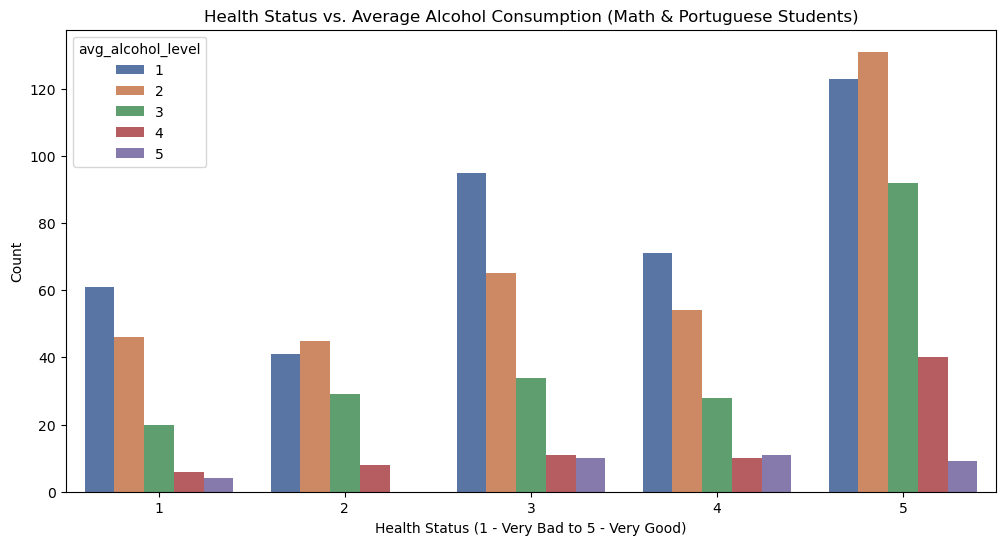

In [382]:
# Define the order for the x-axis (health levels)
x_order = sorted(student_mat["health"].unique())  # Unique levels of health

# Create a custom color palette
hue_order = sorted(student_mat["avg_alcohol_level"].unique())  # Unique levels of avg_alcohol_level
custom_palette = sns.color_palette("deep", len(hue_order))

# Combine datasets with course labels
combined_students = pd.concat([
    student_mat[["health", "avg_alcohol_level"]].assign(course="Math"),
    student_por[["health", "avg_alcohol_level"]].assign(course="Portuguese")
])

# Create figure
plt.figure(figsize=(12, 6))

# Plot countplot for Health vs. Average Alcohol Consumption, separated by course
sns.countplot(
    x="health",  
    data=combined_students, 
    hue="avg_alcohol_level",  # Average Alcohol Consumption as the secondary variable
    palette=custom_palette,
    hue_order=hue_order,
    order=x_order
)

# Labels and Title
plt.title("Health Status vs. Average Alcohol Consumption (Math & Portuguese Students)")
plt.xlabel("Health Status (1 - Very Bad to 5 - Very Good)")
plt.ylabel("Count")

# Show plot
plt.show()


## **Insight 10: Final Check of Correlation Heatmap Analysis for Math and Portuguese Students** 

### **a. Insight Statement**  
> The correlation heatmaps for Math and Portuguese students highlight key relationships between numerical features, with **parental education (`parent_edu`)** showing a moderate correlation with **students' final grades (`G3`)**, while **alcohol consumption (`avg_alcohol`)** exhibits a weak or negligible correlation with performance.

---

### **b. Supporting Evidence**  
- The heatmaps provide an **overview of correlations** among numeric attributes.  
- **Parental education (`parent_edu`) and `G3`** show a moderate positive correlation in both datasets (`0.26` in Math, `0.22` in Portuguese), suggesting students with more educated parents tend to achieve higher grades.  
- **Daily and weekend alcohol consumption (`avg_alcohol`) and `G3`** have weak or near-zero correlation, implying alcohol intake does not strongly impact student grades.  
- **Study time (`studytime`)** has a slightly **negative correlation with absences** (`-0.17` in Math, `-0.15` in Portuguese), meaning students who study more tend to have fewer absences.

---

### **c. Type of Analysis**  
**Multivariate Correlation Analysis**  
- **Heatmaps** were used to visualize the pairwise correlation between numerical attributes.  
- The **color intensity** represents the strength and direction of relationships.  
- Focus was placed on key variables such as **grades, alcohol consumption, absences, and parental education**.

---

### **d. Reproducible Code**  


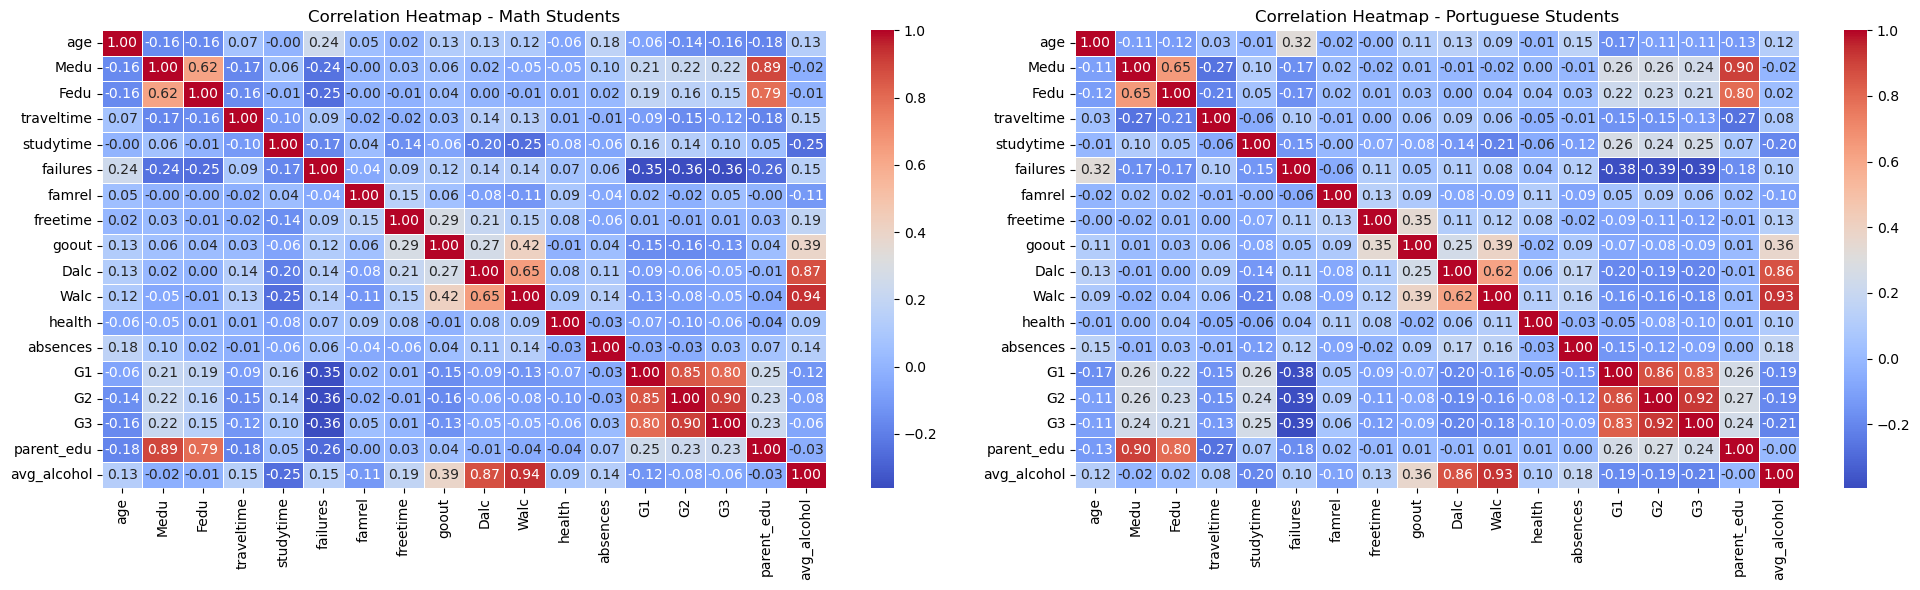

In [383]:
numeric_cols_math = student_mat.select_dtypes(include=["number"])
numeric_cols_por = student_por.select_dtypes(include=["number"])

# Compute the correlation matrix
corr_matrix_math = numeric_cols_math.corr()
corr_matrix_por = numeric_cols_por.corr()

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Heatmap for Math students
sns.heatmap(corr_matrix_math, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title("Correlation Heatmap - Math Students")

# Heatmap for Portuguese students
sns.heatmap(corr_matrix_por, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title("Correlation Heatmap - Portuguese Students")

# Show plot
plt.tight_layout()
plt.show()

# **References**  

## **Dataset Used**  
Dataset I: Student Performance Dataset  
Author: Vala Khorasani   
Ref: [https://archive.ics.uci.edu/ml/datasets/Student+Performance](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

Dataset II: Student Alcohol Consumption  
Author: UCI Machine Learning · Dmitrii Batogov  
Ref: [https://www.kaggle.com/datasets/uciml/student-alcohol-consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)

---

## **Libraries Knowledge**  
 **Data Visualization**  
- **Matplotlib**: [https://matplotlib.org/stable/tutorials/index](https://matplotlib.org/stable/tutorials/index)  
- **Seaborn**: [https://seaborn.pydata.org/tutorial.html](https://seaborn.pydata.org/tutorial.html)  

---

## **Acknowledgments**
- **ChatGPT**: Formatting markdown texts, paraphrasing, grammar checks.  
- **VSCode Copilot & ChatGPT**: Code debugging and troubleshooting assistance.  
